# LINMA 2472 Final Project

In [2]:
# source : https://www.kaggle.com/code/siboli1/starter-breast-cancer-proteomes-823b8eea-7

## 1. Load packages

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## 2. Read Data

In [4]:
print(os.listdir('./dataset'))

['PAM50_proteins.csv', 'clinical_data_breast_cancer.csv', '77_cancer_proteomes_CPTAC_itraq.csv']


In [66]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [54]:

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = np.abs(df.corr())
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [29]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

### A. cancer genes


In [77]:
# specify 'None' if want to read whole file
# 77_cancer_proteomes_CPTAC_itraq.csv has 12553 rows in reality, but we are only loading/previewing the first 1000 rows
# nRowsRead = 1000
nRowsRead = 1000
df1 = pd.read_csv('./dataset/77_cancer_proteomes_CPTAC_itraq.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = '77_cancer_proteomes_CPTAC_itraq.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 1000 rows and 86 columns


In [78]:
cdf1 = df1.dropna()
cdf1.dataframeName = df1.dataframeName+".clean"
nRow, nCol = cdf1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 782 rows and 86 columns


<Figure size 2400x0 with 0 Axes>

/tmp/ipykernel_3362301/2509224368.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


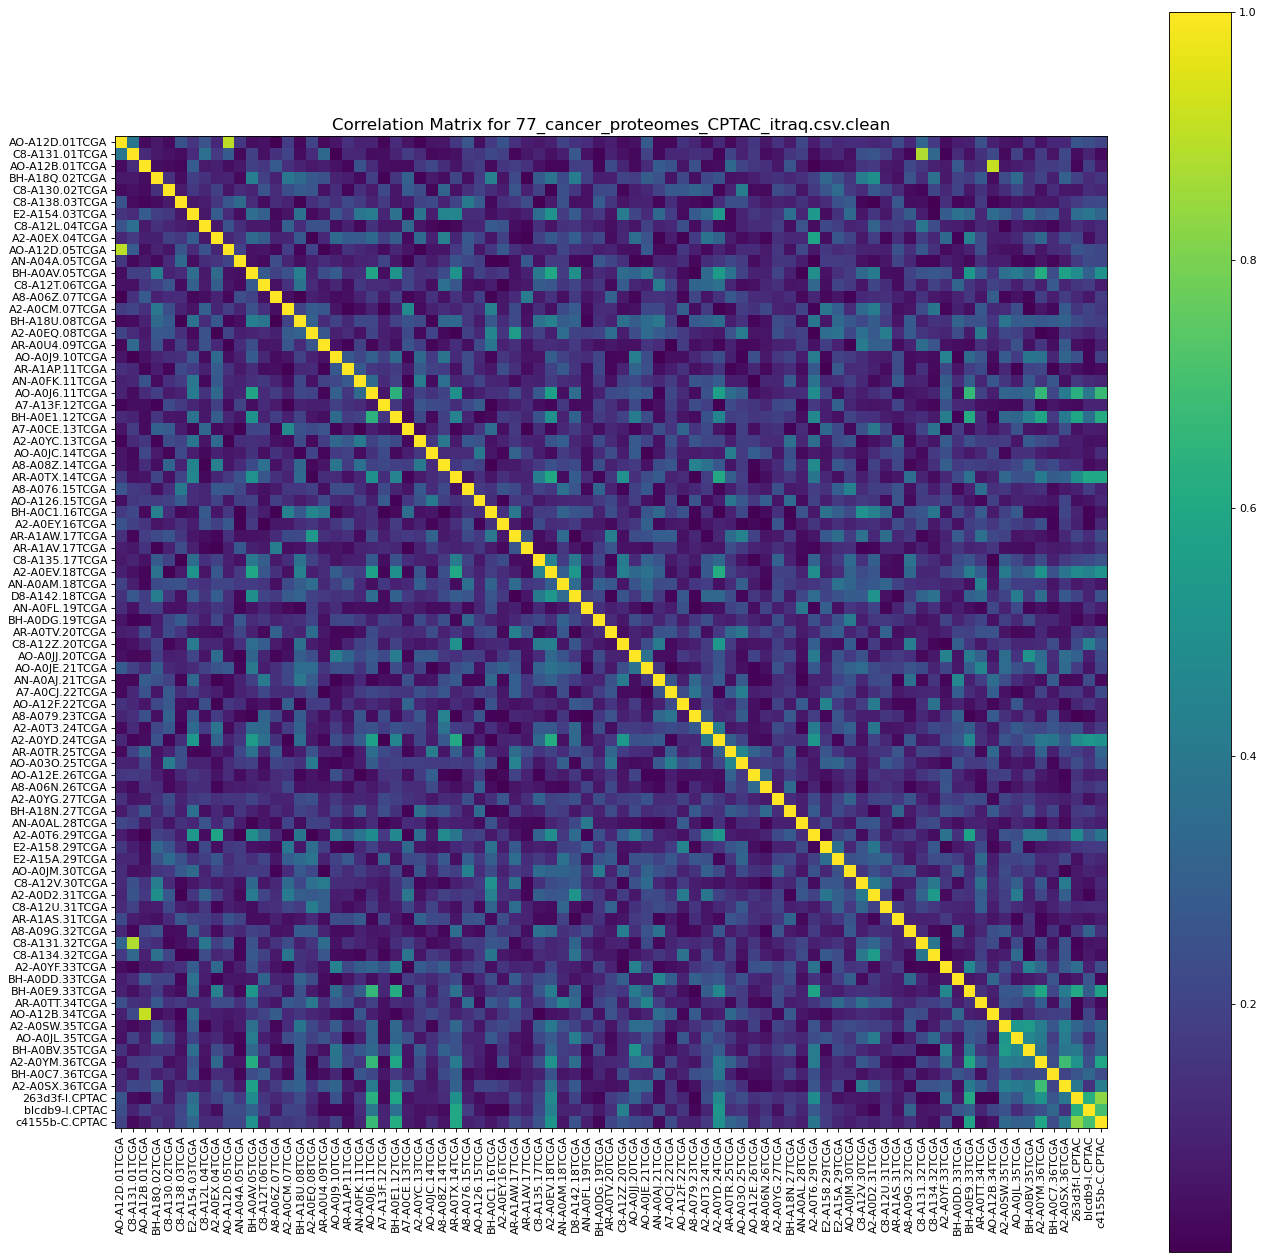

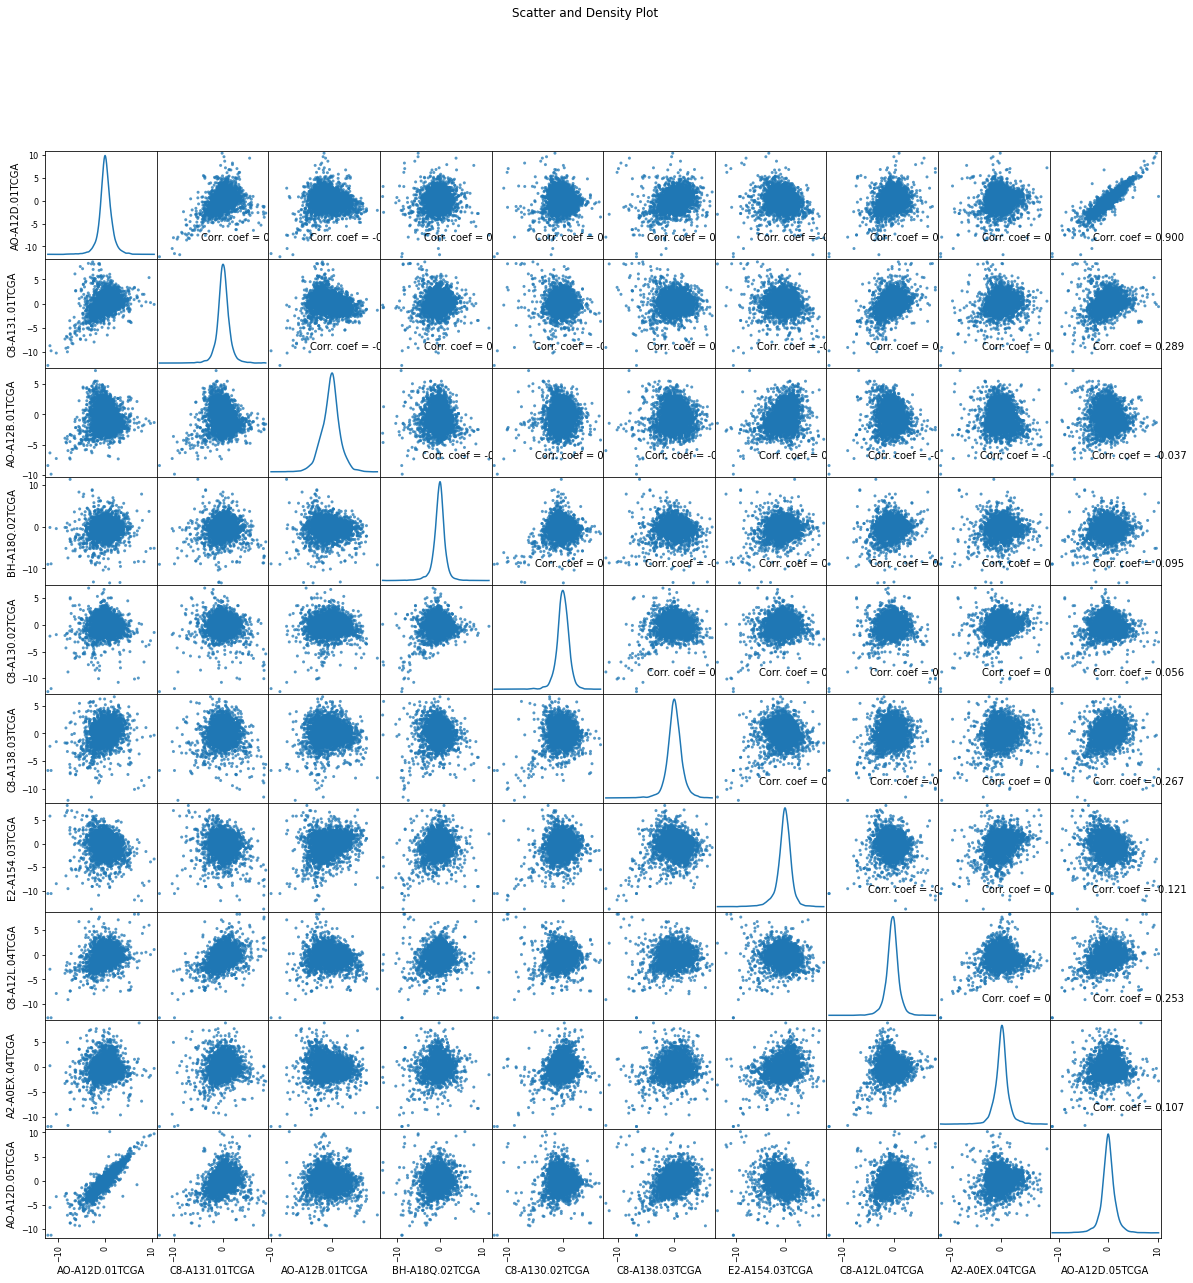

In [76]:
plotPerColumnDistribution(cdf1, 10, 5)
plotCorrelationMatrix(cdf1, 20)
plotScatterMatrix(cdf1, 20, 10)

### B. data breast cancer


In [81]:
nRowsRead = None # specify 'None' if want to read whole file
df2 = pd.read_csv('./dataset/clinical_data_breast_cancer.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'clinical_data_breast_cancer.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 105 rows and 30 columns


In [87]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Complete TCGA ID                     105 non-null    object 
 1   Gender                               105 non-null    object 
 2   Age at Initial Pathologic Diagnosis  105 non-null    int64  
 3   ER Status                            105 non-null    object 
 4   PR Status                            105 non-null    object 
 5   HER2 Final Status                    105 non-null    object 
 6   Tumor                                105 non-null    object 
 7   Tumor--T1 Coded                      105 non-null    object 
 8   Node                                 105 non-null    object 
 9   Node-Coded                           105 non-null    object 
 10  Metastasis                           105 non-null    object 
 11  Metastasis-Coded                

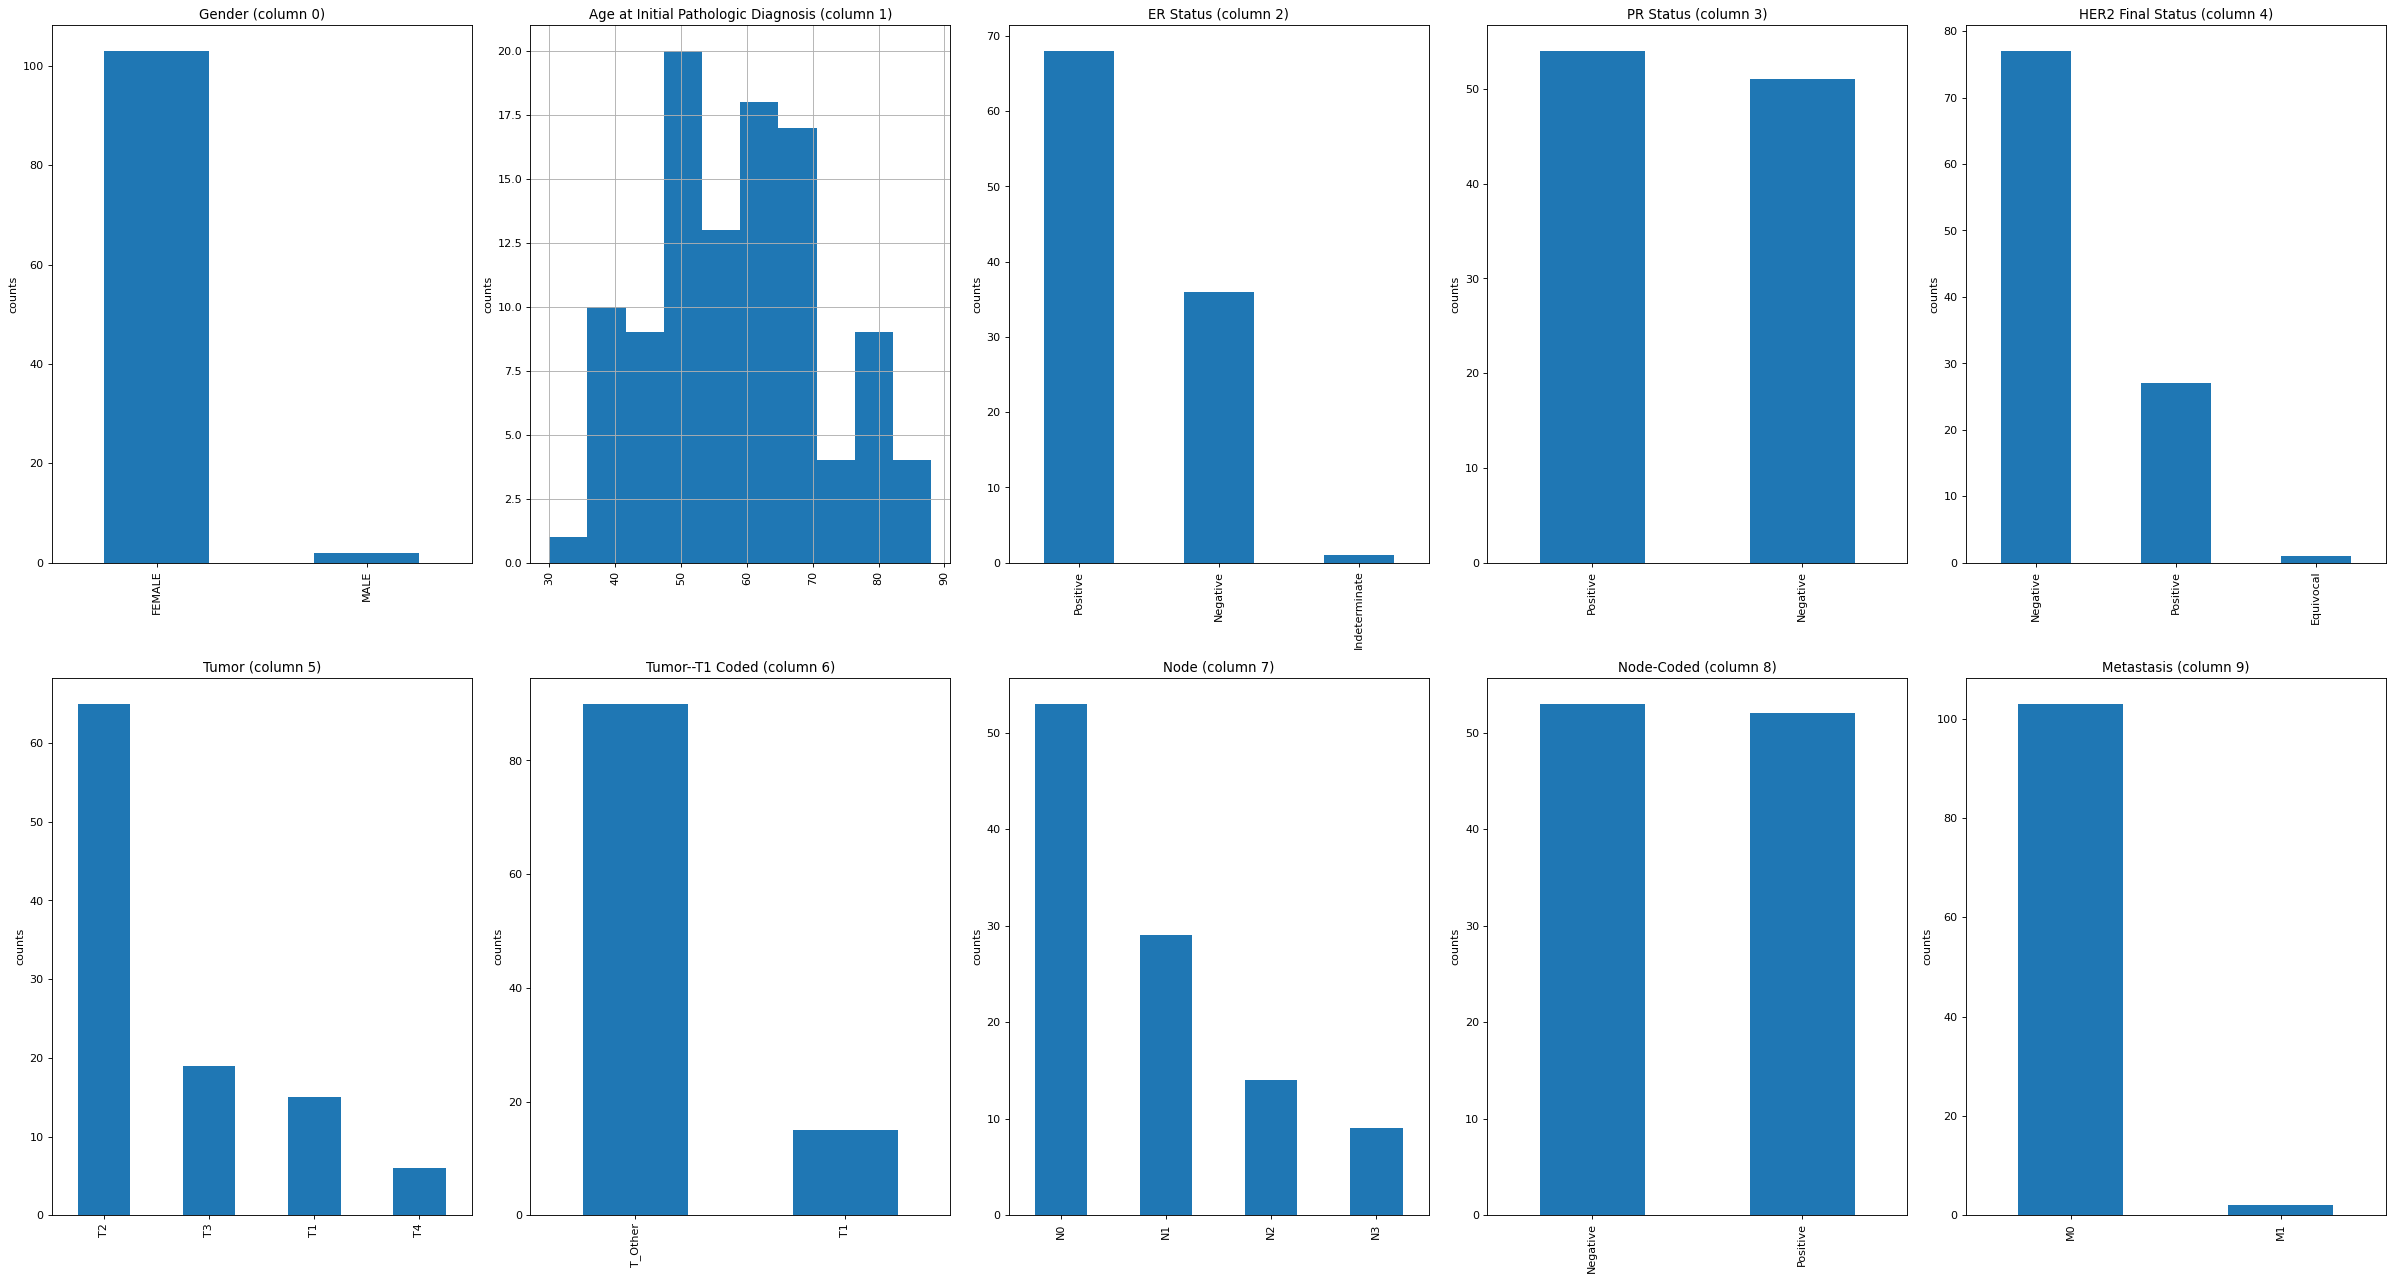

In [88]:
plotPerColumnDistribution(df2, 10, 5)

/tmp/ipykernel_3362301/2509224368.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


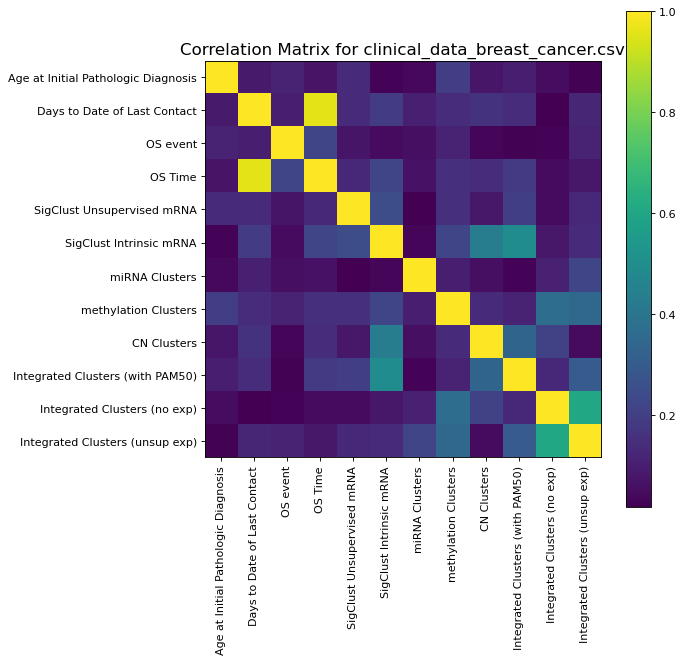

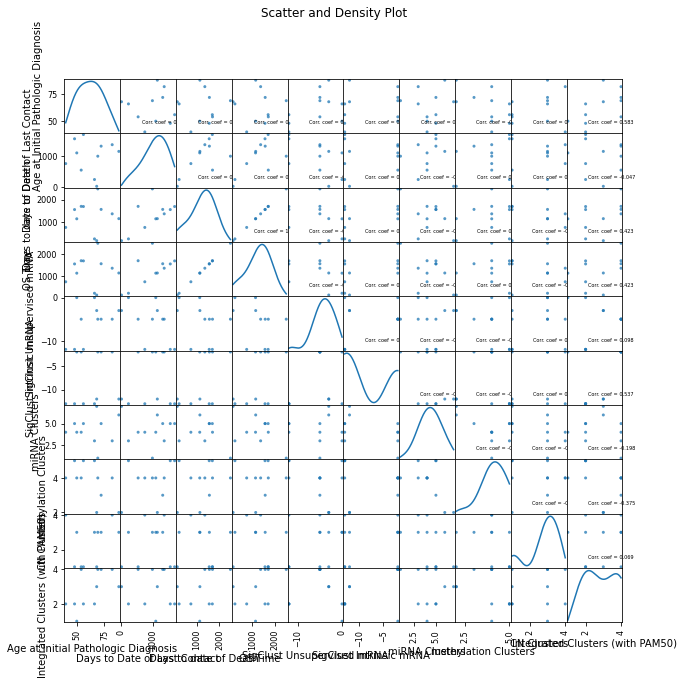

In [101]:
plotCorrelationMatrix(df2, 8)
plotScatterMatrix(df2, 10, 5)

### C. cancer proteins


In [98]:


nRowsRead = None # specify 'None' if want to read whole file
df3 = pd.read_csv('./dataset/PAM50_proteins.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'PAM50_proteins.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')




There are 100 rows and 4 columns


In [99]:
df3.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   GeneSymbol       100 non-null    object
 1   RefSeqProteinID  100 non-null    object
 2   Species          100 non-null    object
 3   Gene Name        100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


In [103]:
# plotCorrelationMatrix(df3, 8)
# plotScatterMatrix(df3, 10, 5)

ValueError: Number of columns must be a positive integer, not 0

<Figure size 720x720 with 0 Axes>